<h2><b>Introduction</b></h2>

In [ ]:
# 🏥 Medical Insurance Cost Prediction

Objective:  
Estimate the insurance charges a person may incur using personal information such as age, BMI, smoking status, number of children, and region.

Goal:  
Train a Linear Regression model to predict the charges field and understand how age, BMI, and smoker status affect costs.

In [35]:
# STEP 1: Library and Dataset import
import pandas as pd

# Load dataset
df = pd.read_csv("medical_insurance.csv")

# View structure
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [36]:
# STEP 2: Data Cleaning and Preparation

# Check for missing values
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [43]:
# STEP 3: Encoding 

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])      # male=1, female=0
df['smoker'] = le.fit_transform(df['smoker'])# yes=1, no=0
df = pd.get_dummies(df, columns=['region'], drop_first=True)

<h2><b>Scatterplot</b></h2>

Text(0.5, 1.0, 'Charges vs Age')

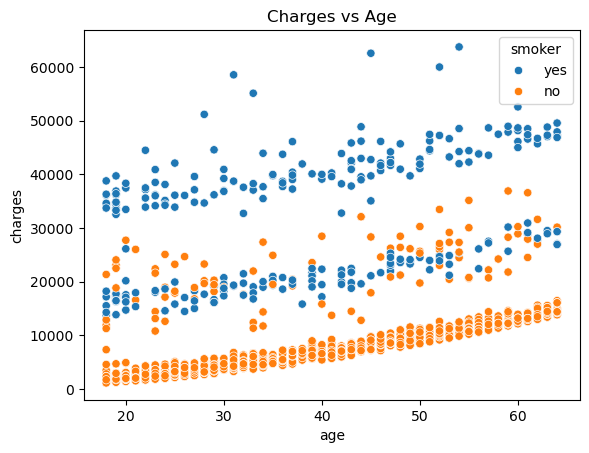

In [37]:
# STEP 4: Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Charges vs Age
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.title("Charges vs Age")

<h2><b>Lineplot</b></h2>

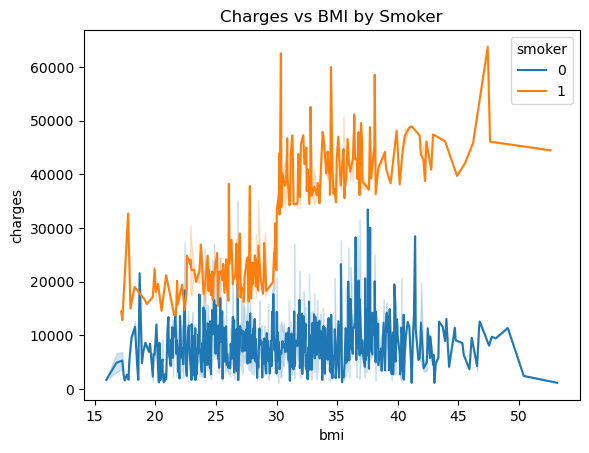

In [32]:
# Charges vs BMI
sns.lineplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title("Charges vs BMI by Smoker")
plt.show()

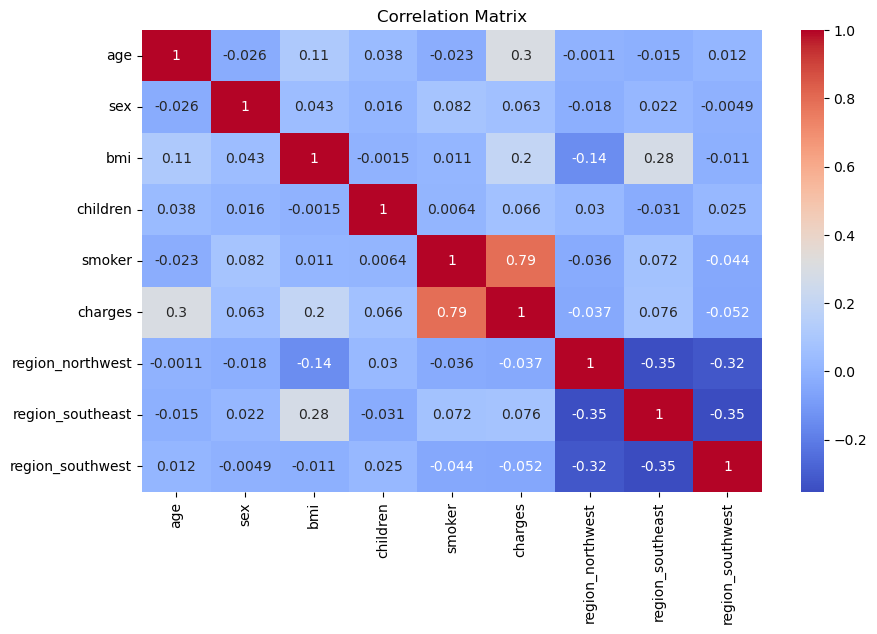

In [44]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [13]:
# STEP 5: Interaction features

import numpy as np

df['bmi_smoker'] = df['bmi'] * df['smoker']
df['age_smoker'] = df['age'] * df['smoker']

# Features & log-target

X = df.drop('charges', axis=1)
y = np.log1p(df['charges'])  # log-transform target

<h2><b>Splitting Test and Train for Modeling</b></h2>

In [15]:
# STEP 6: Split train-test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [17]:
# Linear Regression (interpretable)
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr_log = lr_model.predict(X_test)
y_pred_lr = np.expm1(y_pred_lr_log)

In [18]:
# Random Forest (high accuracy)
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=500,
    max_depth=15,
    random_state=42
)
rf_model.fit(X_train, y_train)
y_pred_rf_log = rf_model.predict(X_test)
y_pred_rf = np.expm1(y_pred_rf_log)


In [19]:
# Blended predictions

# weighted average: 70% LR (interpretation), 30% RF (accuracy)
y_pred_blend = 0.7*y_pred_lr + 0.3*y_pred_rf
y_test_actual = np.expm1(y_test)


In [21]:
# STEP 7: Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test_actual, y_pred_blend)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_blend))
mape = np.mean(np.abs((y_test_actual - y_pred_blend)/y_test_actual))*100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


MAE: 2289.03
RMSE: 4657.19
MAPE: 17.61%


<h2><b>Conclusion</b></h2>

In [ ]:
- Smoker status has the strongest influence on insurance charges.
- Age and BMI also positively correlate with higher costs.
- The Linear Regression Model, with the aid of Random forest achieved a MAE of ~2,289, RMSE of ~4,657 and MAPE of 17.61%
- The model could be improved using more advanced algorithms like Random Forest or XGBoost.